In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import os

In [2]:
# Load the data
df = pd.read_csv('regression_data.csv')

In [3]:
# Drop unnecessary column and convert 'call_date' to datetime
df = df.drop(columns=['Unnamed: 0'])
df['call_date'] = pd.to_datetime(df['call_date'])

In [4]:
# Extract 'month' and 'year' features from 'call_date'
df['month'] = df['call_date'].dt.month
df['year'] = df['call_date'].dt.year

In [5]:
# Drop 'call_date' column
df = df.drop(columns=['call_date'])

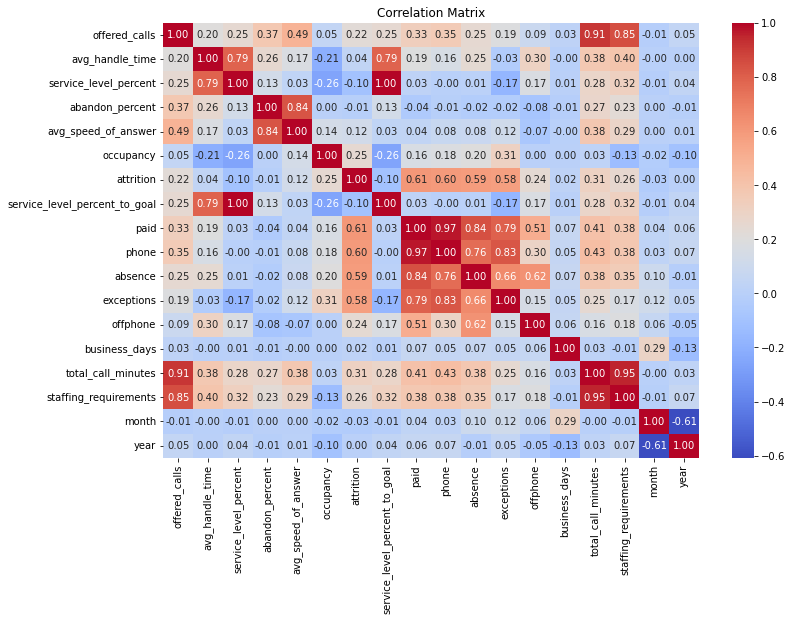

In [6]:
# Calculate and plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
# Save the plot to the 'visualizations' folder
chart_path = os.path.join('visualizations', 'correlation_matrix.png')
plt.savefig(chart_path)

# Display the plot
plt.show()

In [7]:
# Define the features and target
X = df.drop(columns=['staffing_requirements'])
y = df['staffing_requirements']

In [8]:
# One-hot encoding of categorical variables
X = pd.get_dummies(X, columns=['workgroup_set', 'service_name'])

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [11]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"The RMSE of the model is {rmse}")

The RMSE of the model is 4.555487267520068


In [14]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

In [15]:
# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='importance', ascending=False)

print("Feature importances:\n", importances_df)

Feature importances:
                                        feature  importance
14                          total_call_minutes    0.909139
5                                    occupancy    0.026204
1                              avg_handle_time    0.015192
8                                         paid    0.007327
10                                     absence    0.006696
..                                         ...         ...
62       service_name_z_OB_QCB_Cable_Cust_Care    0.000000
61        service_name_z_OB_QCB_Cable_Con_Spec    0.000000
60        service_name_z_OB_QCB_Bend_Retention    0.000000
59   service_name_z_OB_QCB_Bend_Consumer_Sales    0.000000
70  service_name_zzz_OB_QCB_Wireline_Res_Sales    0.000000

[71 rows x 2 columns]


In [16]:
# Create a new DataFrame for simulations
simulations = pd.DataFrame()

# Generate scenarios with service level goal from 100% to 50%
for sl_goal in range(100, 45, -5):
    # Create a copy of the test set
    scenario = X_test.copy()
    # Adjust the service_level_percent_to_goal
    scenario['service_level_percent_to_goal'] = sl_goal / 100
    # Make predictions for this scenario
    scenario['predicted_staffing_requirements'] = model.predict(scenario)
    # Add the scenario to the simulations DataFrame
    simulations = simulations.append(scenario)

# Group the simulations by service level goal and calculate the mean staffing requirements
simulations_grouped = simulations.groupby('service_level_percent_to_goal')['predicted_staffing_requirements'].mean()

print("Simulations:\n", simulations_grouped)

C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usr

Simulations:
 service_level_percent_to_goal
0.50    19.510811
0.55    19.518353
0.60    19.517953
0.65    19.511117
0.70    19.508947
0.75    19.510816
0.80    19.511919
0.85    19.513063
0.90    19.511617
0.95    19.509206
1.00    19.557980
Name: predicted_staffing_requirements, dtype: float64


C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usrocu\AppData\Local\Temp\ipykernel_10692\2364333860.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulations = simulations.append(scenario)
C:\Users\usr

In [17]:
X_test['abandon_percent'].info()

<class 'pandas.core.series.Series'>
Int64Index: 189 entries, 334 to 891
Series name: abandon_percent
Non-Null Count  Dtype  
--------------  -----  
189 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [18]:
# Define the range of changes for each variable
sl_goal_changes = range(65, 30, -5)
abandonement_changes = range(0, 35, 5)  # Hypothetical changes to average handle time
occupancy_changes = range(0, 41, 5)  # Hypothetical changes to occupancy.
workload_changes = range(0, 60000, 6000)  # Hypothetical changes to senior calls

In [19]:
occupancy_changes

range(0, 41, 5)

In [20]:
# Create a list to hold all scenarios
simulations = []

# Generate scenarios
for sl_goal in sl_goal_changes:
    for abandonement_change in abandonement_changes:
        for occupany_change in occupancy_changes:
            for workload_change in workload_changes:
                # Create a copy of the test set
                scenario = X_test.copy()
                # Adjust the variables
                scenario['service_level_percent_to_goal'] = sl_goal / 100
                scenario['abandon_percent'] += abandonement_change / 100
                scenario['occupancy'] += occupany_change / 100
                scenario['total_call_minutes'] += workload_change
                # Make predictions for each scenario
                scenario['predicted_staff_requirements'] = model.predict(scenario)
                # Add the scenario to the simulations list
                simulations.append(scenario)

# Combine all scenarios into one DataFrame
simulations_df = pd.concat(simulations, ignore_index=True)

# Group the simulations by service level goal and calculate the mean staffing requirements
simulations_grouped = simulations_df.groupby(['service_level_percent_to_goal', 'abandon_percent', 'occupancy', 'total_call_minutes'])['predicted_staff_requirements'].mean()

In [21]:
simulations_grouped.to_csv('simulations_grouped.csv')
print(simulations_grouped)

service_level_percent_to_goal  abandon_percent  occupancy  total_call_minutes
0.35                           -0.941058        -0.743134  -0.774167              0.009821
                                                            5999.225833          92.968215
                                                            11999.225833         92.968215
                                                            17999.225833         92.968215
                                                            23999.225833         92.968215
                                                                                   ...    
0.65                            5.658031         1.055560   30000.441807         70.048952
                                                            36000.441807         70.048952
                                                            42000.441807         70.048952
                                                            48000.441807         70.048952
            

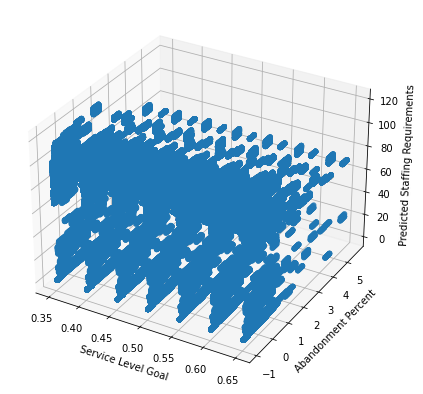

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Prepare data
x = simulations_grouped.index.get_level_values('service_level_percent_to_goal')
y = simulations_grouped.index.get_level_values('abandon_percent')
z = simulations_grouped.values

# Plot data
ax.scatter(x, y, z)

ax.set_xlabel('Service Level Goal')
ax.set_ylabel('Abandonment Percent')
ax.set_zlabel('Predicted Staffing Requirements')

# Save the plot to the 'visualizations' folder
chart_path = os.path.join('visualizations', '3d_scatter.png')
plt.savefig(chart_path)

# Display the plot
plt.show()

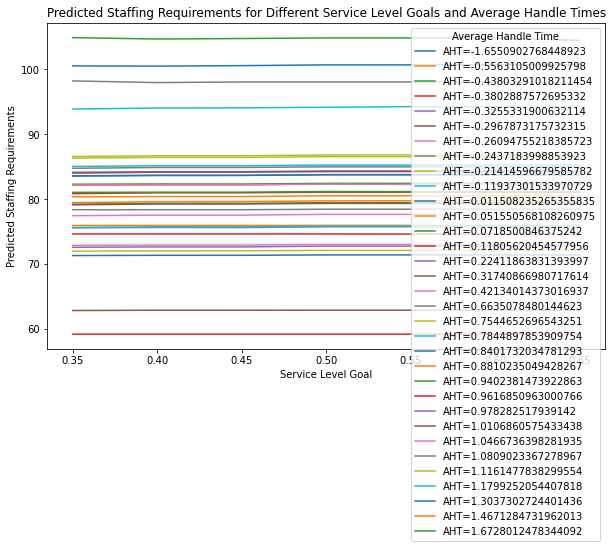

In [23]:
# Set up plot
plt.figure(figsize=(10, 6))

# For simplicity, let's consider only a few unique levels of average handle time.
unique_aht = simulations_df['avg_handle_time'].unique()
unique_aht = np.sort(unique_aht)[::5]  # Select every 5th value for clarity

# Plot a line for each unique level of average handle time
for aht in unique_aht:
    subset = simulations_df[simulations_df['avg_handle_time'] == aht]
    subset_grouped = subset.groupby('service_level_percent_to_goal')['predicted_staff_requirements'].mean()
    plt.plot(subset_grouped.index, subset_grouped.values, label=f'AHT={aht}')

# Add labels and legend
plt.xlabel('Service Level Goal')
plt.ylabel('Predicted Staffing Requirements')
plt.legend(title='Average Handle Time')
plt.title('Predicted Staffing Requirements for Different Service Level Goals and Average Handle Times')

# Display the plot
plt.show()



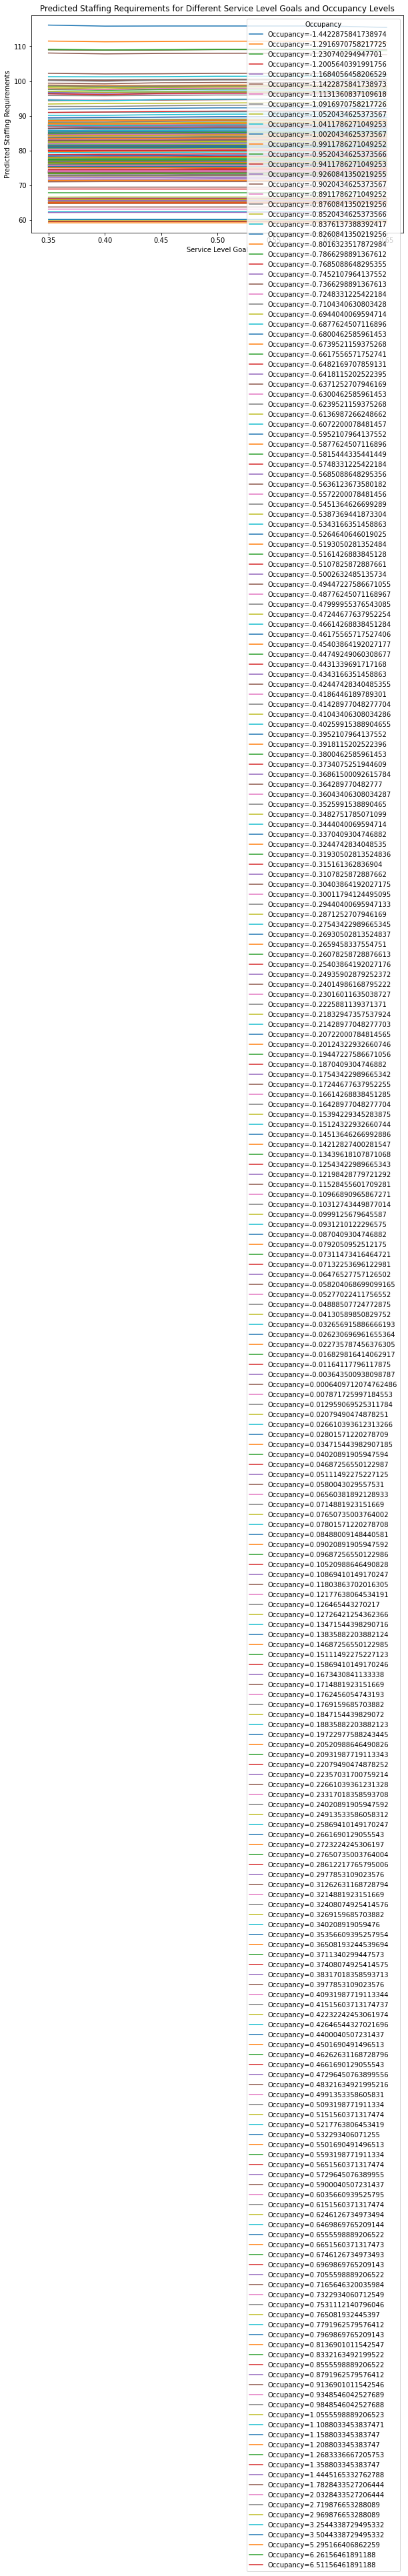

In [24]:
# Set up plot
plt.figure(figsize=(10, 6))

# For simplicity, let's consider only a few unique levels of occupancy.
unique_occupancy = simulations_df['occupancy'].unique()
unique_occupancy = np.sort(unique_occupancy)[::5]  # Select every 5th value for clarity

# Plot a line for each unique level of occupancy
for occupancy in unique_occupancy:
    subset = simulations_df[simulations_df['occupancy'] == occupancy]
    subset_grouped = subset.groupby('service_level_percent_to_goal')['predicted_staff_requirements'].mean()
    plt.plot(subset_grouped.index, subset_grouped.values, label=f'Occupancy={occupancy}')

# Add labels and legend
plt.xlabel('Service Level Goal')
plt.ylabel('Predicted Staffing Requirements')
plt.legend(title='Occupancy')
plt.title('Predicted Staffing Requirements for Different Service Level Goals and Occupancy Levels')

# Display the plot
plt.show()


In [26]:
# Calculate mean, median, and range of predicted staffing requirements for different levels of service level goal
sl_goal_stats = simulations_df.groupby('service_level_percent_to_goal')['predicted_staff_requirements'].agg(['mean', 'median', 'min', 'max'])
sl_goal_stats['range'] = sl_goal_stats['max'] - sl_goal_stats['min']
print("Service Level Goal Statistics")
print(sl_goal_stats)

# Calculate mean, median, and range of predicted staffing requirements for different levels of average handle time
aht_stats = simulations_df.groupby('avg_handle_time')['predicted_staff_requirements'].agg(['mean', 'median', 'min', 'max'])
aht_stats['range'] = aht_stats['max'] - aht_stats['min']
print("\nAverage Handle Time Statistics")
print(aht_stats)

# Calculate mean, median, and range of predicted staffing requirements for different levels of occupancy
occupancy_stats = simulations_df.groupby('occupancy')['predicted_staff_requirements'].agg(['mean', 'median', 'min', 'max'])
occupancy_stats['range'] = occupancy_stats['max'] - occupancy_stats['min']
print("\nOccupancy Statistics")
print(occupancy_stats)

Service Level Goal Statistics
                                    mean     median       min         max  \
service_level_percent_to_goal                                               
0.35                           80.100457  86.081457  0.008272  119.499777   
0.40                           80.140404  86.167608  0.008269  119.267395   
0.45                           80.156449  86.210900  0.008269  119.301216   
0.50                           80.236494  86.292271  0.008269  119.301216   
0.55                           80.235602  86.296851  0.008269  119.301216   
0.60                           80.237808  86.296851  0.008269  119.301216   
0.65                           80.210774  86.250545  0.008269  118.878155   

                                    range  
service_level_percent_to_goal              
0.35                           119.491505  
0.40                           119.259126  
0.45                           119.292948  
0.50                           119.292948  
0.55        